# Week 8. Interactions between independent variables

## By Hyunsu Oh and Charlie Eaton

For this week, we will examine different types of interactions between independent variables using data from the GSS2018.

First of all, load the data and check out how each variable is coded. 

In [1]:
cd "C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)\Week 8"

C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)
> \Week 8


In [2]:
set more off
use "GSS2018w8", clear
des





Contains data from GSS2018w8.dta
  obs:         2,348                          
 vars:             8                          6 Mar 2020 13:48
 size:        58,700                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
age             byte    %8.0g      AGE        Age of respondent
educ            byte    %8.0g      LABK       Highest year of school completed
paeduc          byte    %8.0g      LABK       Highest year school completed,
                                                father
sex             byte    %8.0g      SEX        Respondents sex
race            byte    %8.0g      RACE       Race of respondent
yearsjob        float   %9.0g      YEARSJOB   Time at current job
realrinc        double  %12.0g     LABIH      R's income in constant $
PAS

# 1. Interaction between categorical variables

Let's think about the impacts of race (race) and gender (sex) on income (realrinc). You can hyphothesize racial or gender earning differentials, respectively.

(Your hyphothesis here)

### could you hyphothesize the interactional relationship between race and gender on income? 
How do race and gender affect income differentials interactively?
In other words, what are your expections on income differentials among six racial-gender groups? (white male - white female - black male - black female - other male - other female)

(Your hyphothesis here)

To see group differences, it would be always good for you to visualize them

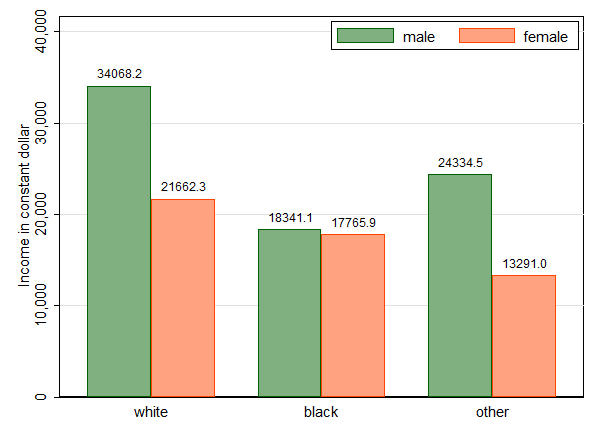



.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1


In [15]:
graph bar realrinc, over(sex) over(race) asyvars ytitle (Income in constant dollar) ///
  blabel(bar, format(%4.1f)) legend(rows(1) position(1) ring(0)) intensity(*.5)
graph display

### Does findings from this graph align with your hyphothesis? Why or why not?

### Run two regression models. First, use race and gender as IVs. Secondly, add interaction terms between race and gender to the first models

In [20]:
est clear

quietly eststo: reg realrinc i.race i.sex
quietly eststo: reg realrinc i.race##i.sex

In [24]:
%html
esttab, stats(r2 N, labels("R2" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") ///
  coeflabels (2.race "Black" 3.race "Other" 2.sex "Female" 2.race#2.sex "Black female" /// 
  3.race#2.sex "Other female")  html

This front-end or document format cannot display HTML

### We have experiences of dealing with regression coefficients. How do you interpret the coefficients of -8693 for black in the first model?

(your interpreation here)

### Then, how would you interpret the coefficients of -15727 for black in the second model?

(your interpretaion here)

In many cases, -margins- command tells us important things

In [18]:
margins i.race##i.sex, atmeans


Adjusted predictions                              Number of obs   =       1363
Model VCE    : OLS

Expression   : Linear prediction, predict()
at           : 1.race          =    .7087307 (mean)
               2.race          =    .1680117 (mean)
               3.race          =    .1232575 (mean)
               1.sex           =    .4739545 (mean)
               2.sex           =    .5260455 (mean)

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
         race |
       white  |   27542.13   903.6378    30.48   0.000     25769.45    29314.81
       black  |    18038.5   1883.737     9.58   0.000     14343.14    21733.85
       other  |   18525.12   2179.868     8.50   0.000     14248.84    22801.39
              |
          sex |
        male  |    30226.1 

Note that because there is no other covariates in this regression model, the margins command gives us exact same results with the bar chart above.

### Now you can more easily understand the regression coefficients. 

For instance, the coefficient of -15727 for black in the second model indicates relative income of black male as compared to white male (18341 = 34068 - 15727).

### If so, how would you interpret the coefficient of 1362 for other female in the second model?

(your interpretaion here)

# 2. Interaction between categorical and continuous variables

### Let's consider the association between race, education, and income

As we did so far, you can hyphothesize the impacts of race and education, respectively, or their interactive impact on income

(Your hyphothesis here)

### Run regression models

In [30]:
est clear

quietly eststo: reg realrinc i.race educ
quietly eststo: reg realrinc i.race##c.educ

In [32]:
%html
esttab, stats(r2 N, labels("R2" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") ///
  coeflabels (2.race "Black" 3.race "Other" educ "Years of education" ///
  2.race#c.educ "Black * education" 3.race#c.educ "Other * education") html

This front-end or document format cannot display HTML

When comparing two models, what are differences on significance and direction of the coefficients? How would you interpret them?

(Your interpretation here)

### In this case, -margins- and -marginsplot- may be great option for examining the interaction effect





  Variables that uniquely identify margins: educ race


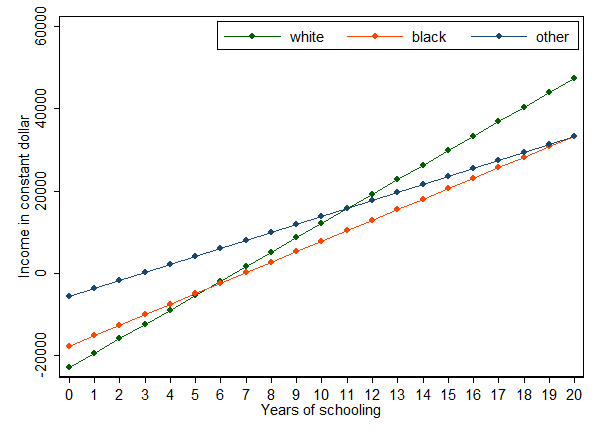


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1


In [4]:
quietly reg realrinc i.race##c.educ
quietly margins race, at(educ=(0(1)20)) atmeans
marginsplot, noci legend(on) title("") subtitle("") xtitle("Years of schooling") ///
  ytitle("Income in constant dollar") legend(rows(1) position(1) ring(0))
graph display

### Using this figure, you can see the interaction effect of race and education on income. How would you interpret the interaction effect? 

# 3. Interaction between continuous variables

### Lastly, let's examine the impacts of age and work experience on income

You may want to generate scatterplots

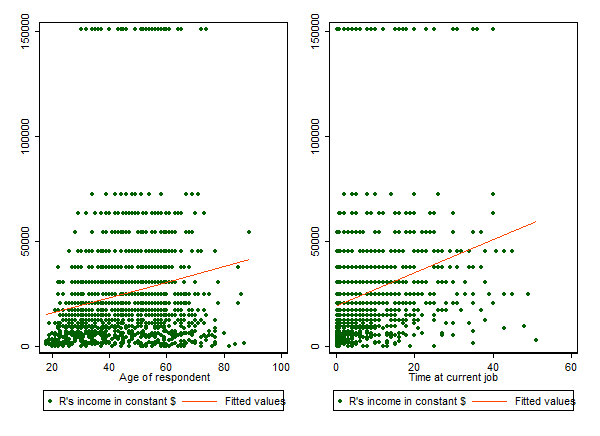





.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1


In [3]:
quietly twoway (scatter realrinc age) (lfit realrinc age), name(age)
quietly twoway (scatter realrinc yearsjob) (lfit realrinc yearsjob), name(yearsjob)
  graph combine age yearsjob
  graph display

Scatterplots suggest that there are positive relationships between age and income and between work experience and income

### Run regression models

In [6]:
est clear

quietly eststo: reg realrinc age yearsjob
quietly eststo: reg realrinc c.age##c.yearsjob

In [8]:
%html
esttab, stats(r2 N, labels("R2" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") ///
  coeflabels (age "Age" yearsjob "Work experience" c.age#c.yearsjob "Age * work experience") html


This front-end or document format cannot display HTML

The interaction term reveals a negative impact. How would you interpret this?

### -marginsplot- will provide you some clues





  Variables that uniquely identify margins: age yearsjob


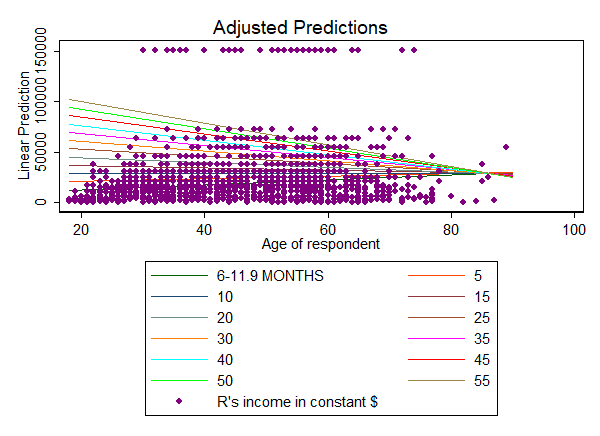


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1


In [12]:
quietly reg realrinc c.age##c.yearsjob
quietly margins, at(age=(18 90) yearsjob=(0(5)55)) vsquish
marginsplot, noci x(age) recast(line) addplot(scatter realrinc age) xlabel(20(10)90)
graph display

### Now you are able to interpret the graph above regarding the interaction effect

(Your interpretation)